In [37]:
import numpy as np
from scipy.stats import beta, binom
from scipy.special import gamma as G
import math
from matplotlib import pyplot as plt

In [38]:
n1 = 15
y1 = 2
a = 1
b = 1
n2 = 50

In [39]:
def binomial_coef(n, k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

In [40]:
def diff_factorials(num, den):
    res = 1
    for i in range(num+1, den+1):
        res *= i
    return res

### a) Posterior theta|y1

In [41]:
theta_y1 = beta(a=a+y1, b=b+n1-y1)
x = np.linspace(theta_y1.ppf(0.0), theta_y1.ppf(1), 100)
print('Posterior(theta|y1): Mean {:.3f}, mode {:.3f}, variance {:.3f}'.format(theta_y1.mean(), 
                                                x[np.argmax(theta_y1.pdf(x))], theta_y1.var()))

Posterior(theta|y1): Mean 0.176, mode 0.131, variance 0.008


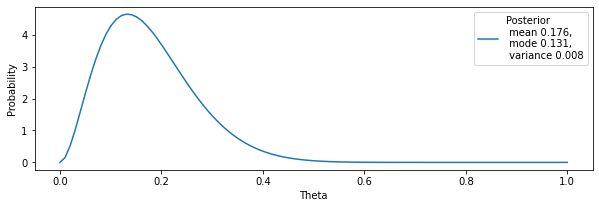

In [42]:
plt.figure(figsize = (10,3))
plt.plot(x, theta_y1.pdf(x), label = 'Posterior \n mean {:.3f}, \n mode {:.3f}, \n variance {:.3f}'.format(theta_y1.mean(), 
                                                x[np.argmax(theta_y1.pdf(x))], theta_y1.var()))
plt.xlabel('Theta')
plt.ylabel('Probability')
plt.legend()
plt.savefig('/nfs/scistore12/gaspgrp/emaksimo/courses/CompBayesStat/plots/Ex1_6_Fig1.png')

### b-c) Pr(Y2|Y1=2) 

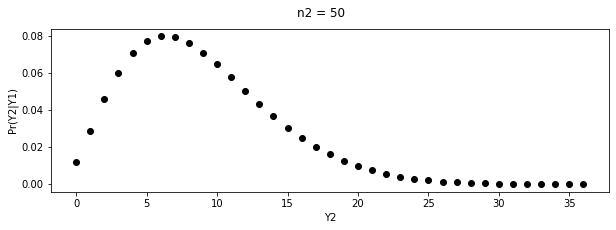

In [44]:
plt.figure(figsize = (10,3))
plt.suptitle('n2 = {}'.format(n2))

for y2 in np.arange(0, n2-13, 1):
    c1 = G(17)/(G(14)*G(3))
    c2 = binomial_coef(n2, y2)
    c3 = G(y2+3)*G(n2-y2+14)/G(n2+17)
    # c_Y2Y1 = G(y2+3)*  diff_factorials(n2-y2-12, n2-9)
    Y2_Y1 = c1*c2*c3
    plt.scatter(y2, Y2_Y1, label = 'y2 = {}'.format(y2), color='k')

plt.xlabel('Y2')
plt.ylabel('Pr(Y2|Y1)')
# plt.legend()
    
plt.savefig('/nfs/scistore12/gaspgrp/emaksimo/courses/CompBayesStat/plots/Ex1_6_Fig2.png')

In [21]:
y2=2
beta.cdf(x=1, a=1+n2+y1, b=1+n1+n2-y1-y2)

1.0